<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/test916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤넘버 그래프

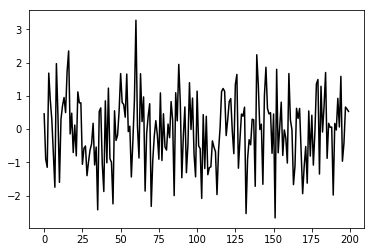

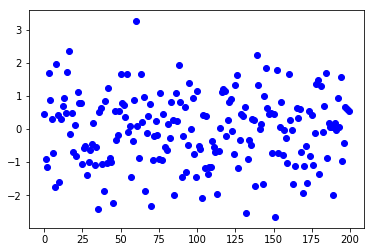

(array([ 6., 12., 29., 33., 40., 44., 19., 14.,  2.,  1.]),
 array([-2.67106639, -2.07684243, -1.48261846, -0.8883945 , -0.29417053,
         0.30005344,  0.8942774 ,  1.48850137,  2.08272534,  2.6769493 ,
         3.27117327]),
 <a list of 10 Patch objects>)

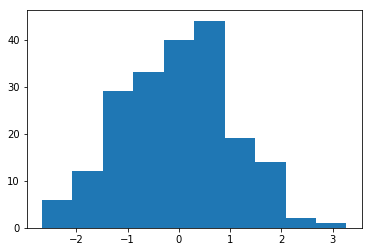

In [296]:
import numpy as np
import matplotlib.pyplot as plt
n = 200
y = np.random.randn(n)
x = range(n)
plt.plot(x, y, c='k')
y.mean()
plt.show()
plt.scatter(x, y, c='b')
plt.show()
plt.hist(y, bins=10)


공식 y = 3*x1 + 4*x2 + 5공식에서

y의 W1(3), W2(4), b(5)값을 찿는것

3, 4, 5는 임의의 제공값임

Ir : Leaning rate(계산시간을 의미)

w값이 많아질수록 값은 작아짐 실행으로 찾는다 어려움이 많다

In [148]:
x1 = np.random.rand(3)
x2 = np.random.rand(3)

y = x1*3 + x2*4 + 5

w1 = np.random.rand(1)
w2 = np.random.rand(1)

b = np.random.rand()
ir = 1

for i in range(500):
  y_pred = w1*x1 + w2*x2 + b
  e = y_pred - y
  w1 = w1 - ir*(e*x1).mean()
  w2 = w2 - ir*(e*x2).mean()

  b = b - ir*e.mean()
  print('i=', i, 'w1=',w1, 'w2=',w2,'b=', b, 'x1=',x1, 'x2=', x2,'error=', e.mean())
 


i= 0 w1= [3.89640902] w2= [6.11627004] b= 8.232264640061471 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= -7.353648748715606
i= 1 w1= [1.81275639] w2= [2.3614735] b= 3.1023656623218328 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= 5.129898977739638
i= 2 w1= [3.29729316] w2= [4.97015128] b= 6.663147920544658 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= -3.5607822582228246
i= 3 w1= [2.29591778] w2= [3.14941341] b= 4.174755684833491 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= 2.4883922357111667
i= 4 w1= [3.02313547] w2= [4.41239417] b= 5.897872478423203 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= -1.7231167935897123
i= 5 w1= [2.5452548] w2= [3.52902692] b= 4.689791509776972 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= 1.2080809686462306
i= 6 w1= [2.9045

## gradiant descent구현해보기
   처음에 준비할일 : x, y준비하기

In [0]:
# n = 100
# x1 = np.random.rand(n)
# x2 = np.random.rand(n)
# y = x1*3 + x2*0.5 + 1

# x = np.vstack((x1,x2)).T
# x[:5]

# # from sklearn.linear_model import SGDRegressor
# # model = SGDRegressor() # (1) 모델 선택
# # model.fit(x, y) #(2) 모델 학습
# model.coef_, model.intercept_
# model.predict([[0.6, 1], [0.5, 0.5]])
# # 실행않됨

# from sklearn.linear_model import LinearRegression
# model = LinearRegression() # (1) 모델 선택
# model.fit(x, y) #(2) 모델 학습 # 실행가능
# model.coef_, model.intercept_
# model.predict([[0.6, 1], [0.5, 0.5]])

# # from sklearn.tree import DecisionTreeRegressor
# # model = DecisionTreeRegressor() # (1) 모델 선택
# # model.fit(x, y) #(2) 모델 학습
# model.coef_, model.intercept_
# model.predict([[0.6, 1], [0.5, 0.5]])

In [0]:
n = 100
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = x1*3 + x2*0.5 + 1

In [276]:
x1.shape, x2.shape, y.shape

((100,), (100,), (100,))

In [0]:
x = np.vstack((x1,x2)).T

In [293]:
x.shape

(100, 2)

In [279]:
x

array([[0.28605969, 0.66575801],
       [0.28437959, 0.36292207],
       [0.54977634, 0.83289429],
       [0.26413805, 0.78527454],
       [0.18003818, 0.02061179],
       [0.72130046, 0.43252073],
       [0.86425185, 0.56608732],
       [0.02794195, 0.36280971],
       [0.04287556, 0.70681984],
       [0.27243313, 0.71608913],
       [0.5337766 , 0.97975843],
       [0.8339377 , 0.87876974],
       [0.99277705, 0.52440297],
       [0.96414457, 0.17002373],
       [0.2203509 , 0.21462615],
       [0.65030977, 0.85994924],
       [0.52593667, 0.18822165],
       [0.24552943, 0.1843517 ],
       [0.0589906 , 0.37092715],
       [0.16869107, 0.01364132],
       [0.91058876, 0.78192684],
       [0.73708304, 0.89092439],
       [0.67519676, 0.31513846],
       [0.59827802, 0.96522266],
       [0.6421937 , 0.77556809],
       [0.03954977, 0.55319754],
       [0.44780648, 0.51371894],
       [0.28157576, 0.33900506],
       [0.0269231 , 0.47772989],
       [0.52046715, 0.09918893],
       [0.

In [0]:
x[:5]

In [0]:
# from sklearn.linear_model import SGDRegressor
# model = SGDRegressor() # (1) 모델 선택
# model.fit(x, y) #(2) 모델 학습
# # 실행않됨

In [0]:
model.coef_, model.intercept_

In [0]:
model.predict([[0.6, 1], [0.5, 0.5]])

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 선택
model.fit(x, y) #(2) 모델 학습
# 실행가능

In [0]:
model.coef_, model.intercept_

In [0]:
model.predict([[0.6, 1], [0.5, 0.5]])

In [0]:
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor() # (1) 모델 선택
# model.fit(x, y) #Deci(2) 모델 학습
# # 실행않됨

In [0]:
model.coef_, model.intercept_

In [0]:
model.predict([[0.6, 1], [0.5, 0.5]])